In [3]:
import os, sys, inspect

cmd_folder = os.path.realpath(
    os.path.dirname(
        os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0])))

if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
    
from transitions.extensions import MachineFactory
from IPython.display import Image, display, display_png

class Matter(object):
    pass

def show_graph(self):
    self.graph.draw('state.png', prog='dot')
    display(Image('state.png'))     

GraphMachine = MachineFactory.get_predefined(graph=True, nested=True)
GraphMachine.show_graph = show_graph

   

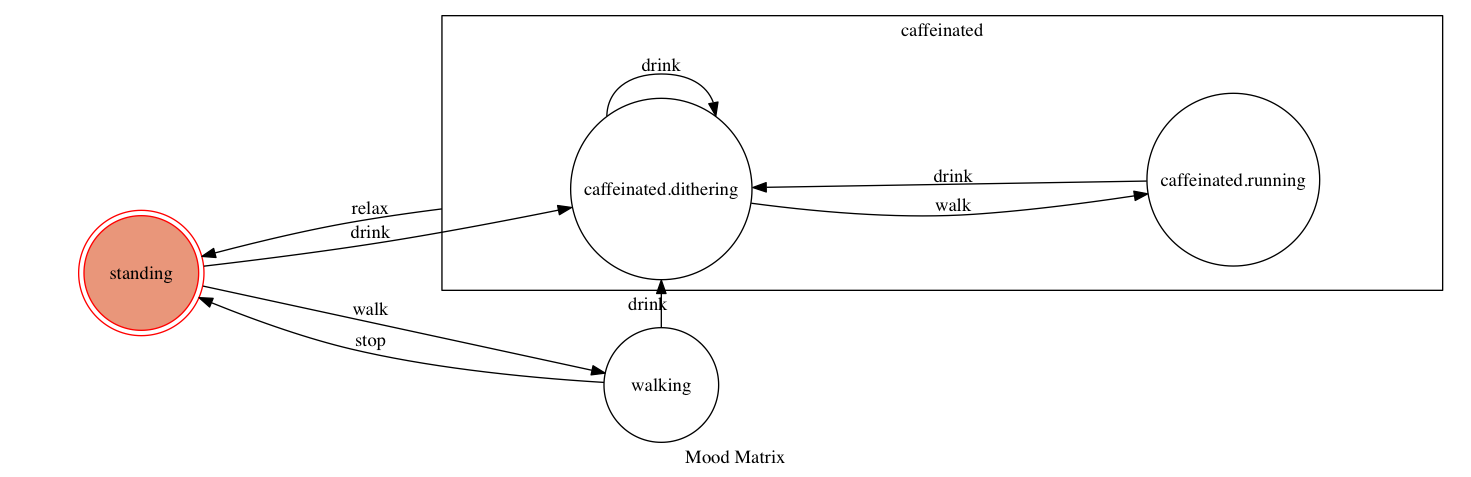

In [4]:
states = ['standing', 'walking', {'name': 'caffeinated', 'children':['dithering', 'running']}]
transitions = [
  ['walk', 'standing', 'walking'],
  ['stop', 'walking', 'standing'],
  ['drink', '*', 'caffeinated.dithering'],
  ['walk', 'caffeinated.dithering', 'caffeinated.running'],
  ['relax', 'caffeinated', 'standing']
]

machine = GraphMachine(model=Matter(), 
                         states=states, 
                         transitions=transitions, 
                         auto_transitions=False, 
                         initial='standing', 
                         title="Mood Matrix")
machine.show_graph()
machine.get_graph().draw('/Users/alneuman/Desktop/g.dot', prog='dot')


('standing', 'walking')


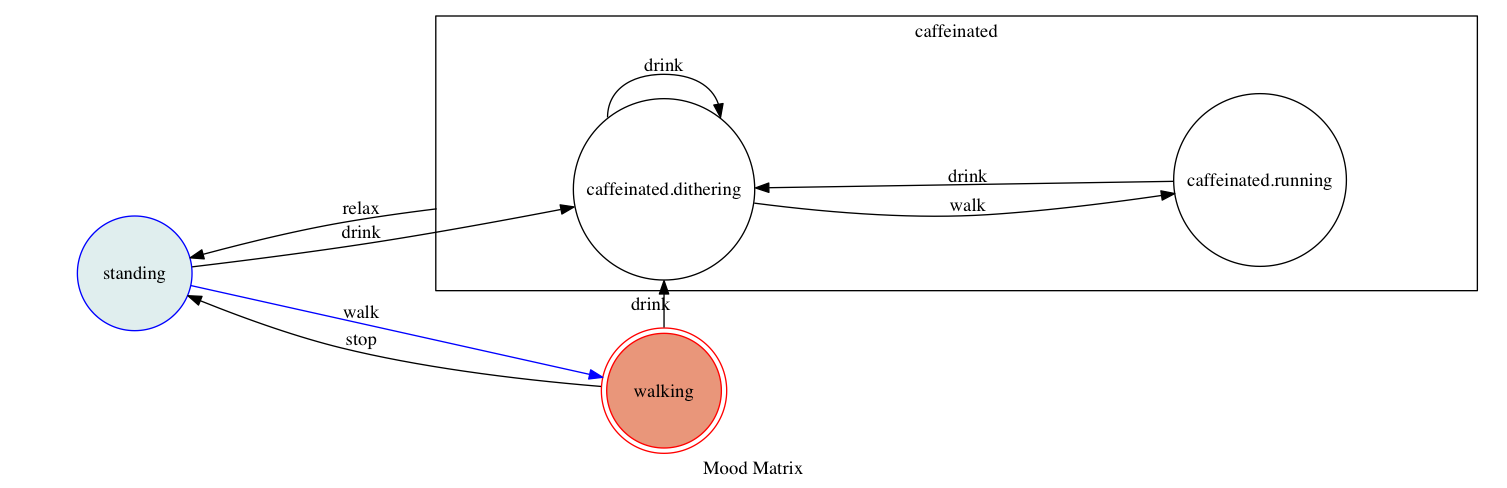

In [5]:
machine.model.walk()
machine.show_graph()

('walking', 'caffeinated.dithering')


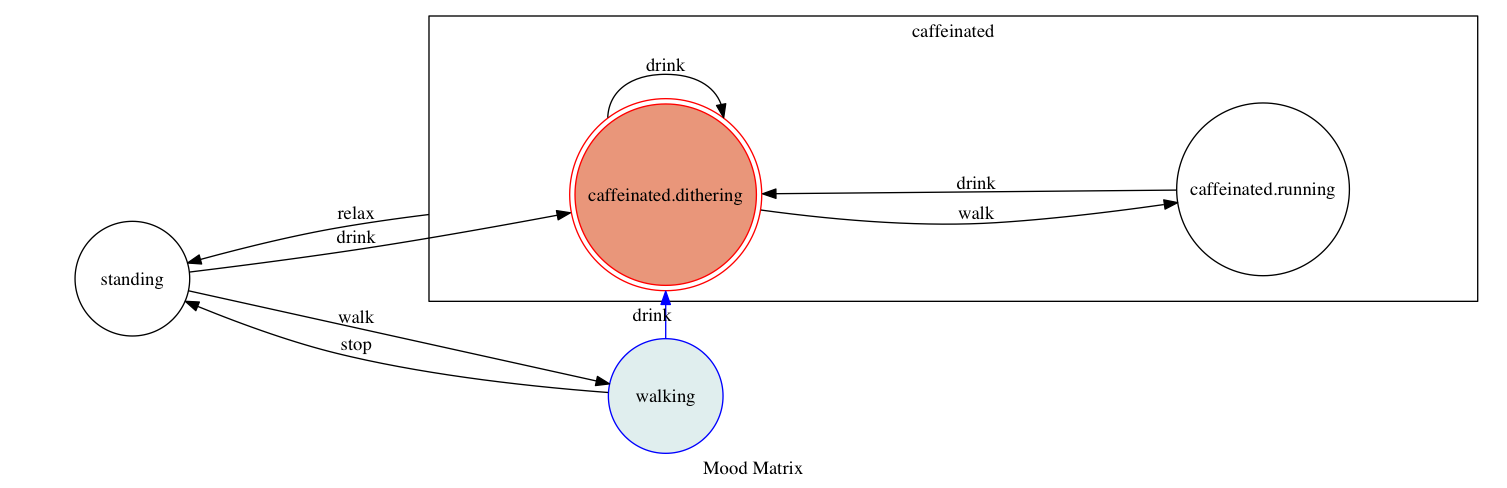

In [6]:
machine.model.drink()
machine.show_graph()

('caffeinated.dithering', 'standing')


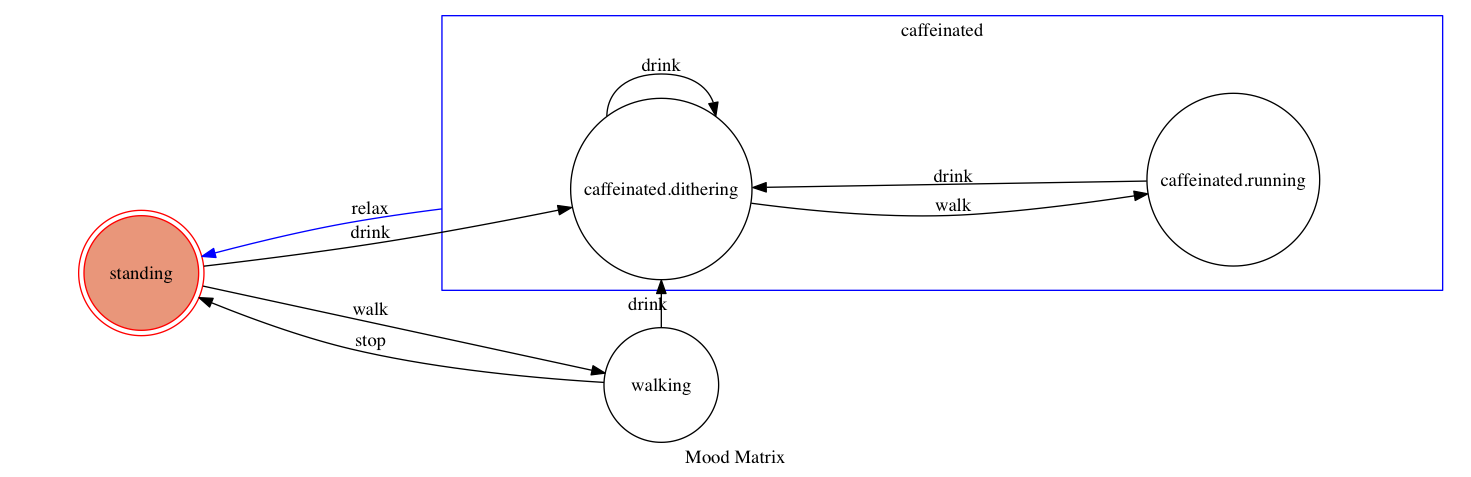

In [7]:
machine.model.relax()
machine.show_graph()